In [1]:
import menpo
import menpofit
import pickle
from pathlib import Path

#with open('lk_aam_fitter.pkl', 'rb') as f:
#    fitter = pickle.load(f)

import gzip

with gzip.open('keypoint_model.pkl.gz') as f:
    fitter = pickle.load(f)

In [2]:
from menpodetect.dlib.detect import DlibDetector
import dlib

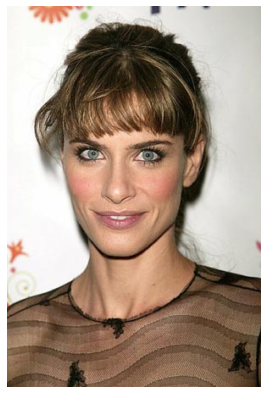

In [3]:
test_img = menpo.io.import_image(Path('./lfpw/trainset/image_0002.png'))
test_img.view()

In [4]:
ff_detector = dlib.get_frontal_face_detector()
bboxes = DlibDetector(ff_detector)(test_img)
fr = fitter.fit_from_bb(test_img, bboxes[0], gt_shape = test_img.landmarks['PTS'], max_iters=100)

In [5]:
from menpofit.error.base import euclidean_error
import time

det = DlibDetector(ff_detector)
def calculate_error(img):
    bboxes = det(img)
    if len(bboxes) == 0:
        return None
    fr = fitter.fit_from_bb(img, bboxes[0], gt_shape=img.landmarks['PTS'], max_iters=100)
    return fr.final_error(compute_error=euclidean_error)

start = time.time()
errors = [calculate_error(img) for img in menpo.io.import_images(Path('./lfpw/testset'))]
end = time.time()
print(end - start)

31.77436590194702


In [6]:
import numpy as np
errors = [e for e in errors if e is not None]
np.mean(errors)

19.875123631623246

In [7]:
np.max(errors), np.min(errors)

(402.69648940895195, 1.3606746755953107)